In [2]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# First we need to fetch some data using Python requests from API
# Read more about Python requests:
# http://docs.python-requests.org/en/master/user/quickstart/

import requests

response = requests.get("http://api.dronestre.am/data")
json_data = response.json()
drone = pd.DataFrame(json_data['strike'])

In [10]:
drone.head()
drone.tail()

,_id,articles,bij_link,bij_summary_short,bureau_id,children,civilians,country,date,deaths,...,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id
616,56d9f27d395e4f60f00bca0d,[],https://www.thebureauinvestigates.com/2016/01/...,,YEM216,,,Yemen,2016-03-04T00:00:00.000Z,4,...,,,Shabwah Province,,[],"Paper is all that remained. Dollars, leaflets....",617,,Radhum,705788402944380929
617,56e74090395e4f60f00bca0e,[],https://www.thebureauinvestigates.com/2012/02/...,,SOM031,,,Somalia,2016-03-05T00:00:00.000Z,150,...,,3.558808,Hiran,45.054424,[],"On Saturday, a U.S. drone strike killed 150 pe...",618,,Raso,706906963603492865
618,56fd916c395e4f60f00bca0f,[],https://www.thebureauinvestigates.com/2016/01/...,,YEM218,,,Yemen,2016-03-26T00:00:00.000Z,8,...,,,Abyan Province,,[],"Eight men gathered in a courtyard. Above them,...",619,,Al Hudhn and Naqeel al Hayala villages,714155412644347906
619,570153e2395e4f60f00bca10,[],https://www.thebureauinvestigates.com/2012/02/...,,SOM032,,,Somalia,2016-03-31T00:00:00.000Z,3,...,,0.474101,Middle Juba,42.779399,[],"In the early evening, about 20 miles from Jili...",620,,Jilib,716042515355406336
620,570e6035395e4f60f00bca11,[],https://www.thebureauinvestigates.com/2012/02/...,,SOM037,,3,Somalia,2016-04-12T00:00:00.000Z,12,...,,-0.33997,Lower Juba,42.54606,[],"On Monday, and then again on Tuesday, they fle...",621,,Kismayo,720077417176567808


In [9]:
drone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 22 columns):
_id                  621 non-null object
articles             621 non-null object
bij_link             621 non-null object
bij_summary_short    621 non-null object
bureau_id            621 non-null object
children             621 non-null object
civilians            621 non-null object
country              621 non-null object
date                 621 non-null object
deaths               621 non-null object
deaths_max           621 non-null object
deaths_min           621 non-null object
injuries             621 non-null object
lat                  621 non-null object
location             621 non-null object
lon                  621 non-null object
names                621 non-null object
narrative            621 non-null object
number               621 non-null int64
target               621 non-null object
town                 621 non-null object
tweet_id             621 non-null o

In [19]:
drone.deaths_max.count().sum()

621

country
Pakistan                       428
Pakistan-Afghanistan Border      1
Somalia                         19
Yemen                          173
dtype: int64


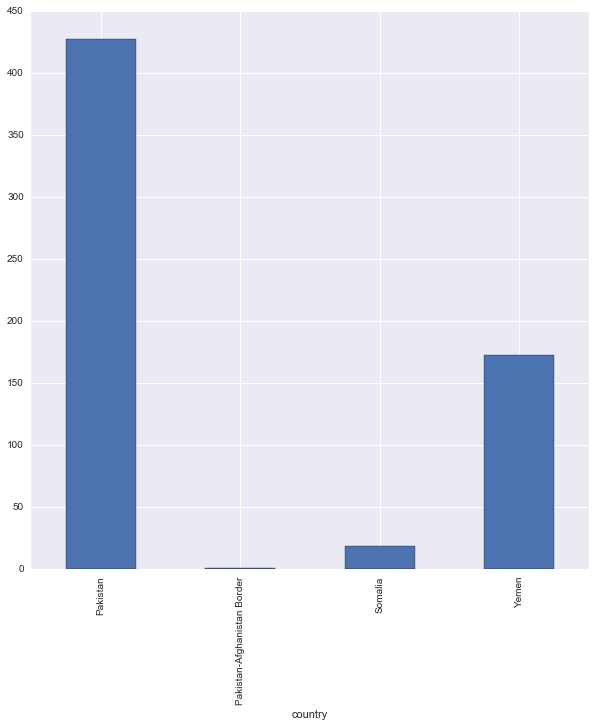

In [110]:
print drone.groupby('country').size()
drone.groupby('country').size().plot(kind = 'bar', figsize = (10,10))

In [52]:
drone.names.unique

<bound method Series.unique of 0      [Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...
1      [Nek Mohammad, Fakhar Zaman, Azmat Khan, Marez...
2                    [Haitham al-Yemeni, Samiullah Khan]
3                                                     []
4      [Abu Hamza Rabia, Suleiman al-Moghrabi, Amer A...
5                                                     []
6                                                     []
7      [Maulvi Liaqat, Mohammad Tahir (16), Maulvi Kh...
8                                [Katoor Khan, Taj Alam]
9                                                     []
10                                                    []
11                                                    []
12                                                    []
13                                                    []
14                                                    []
15                                                    []
16                                                    []


In [53]:
drone.location

0           Marib Province
1         South Waziristan
2         North Waziristan
3         North Waziristan
4         North Waziristan
5         North Waziristan
6            Bajaur Agency
7            Bajaur Agency
8         South Waziristan
9         North Waziristan
10        North Waziristan
11        North Waziristan
12          Bannu Frontier
13        North Waziristan
14        South Waziristan
15        South Waziristan
16           Bajaur Agency
17        South Waziristan
18        South Waziristan
19        South Waziristan
20        South Waziristan
21        South Waziristan
22        South Waziristan
23        North Waziristan
24        North Waziristan
25        North Waziristan
26        North Waziristan
27        North Waziristan
28        North Waziristan
29        South Waziristan
              ...         
591    Hadhramaut Province
592    Hadhramaut Province
593       Shabwah Province
594    Hadhramaut Province
595                   Gedo
596         Abyan Province
5

location
Hiran                              1
Orakzai Agency                     1
Lower Kurram                       1
Lahij and Abyan Provinces          1
South/North Waziristan border      1
Khyber Pakhtunkhwa                 1
Kabul River                        1
Orakzai/North Waziristan           1
Dolbiyow                           1
North/South Waziristan border      1
Bay                                1
Banaadir                           1
Saada Province                     1
Aden                               1
Dhammar Province                   1
Gedo                               2
Lahj Province                      2
Sanaa Province                     2
Unknown                            2
Middle Juba                        3
Bannu Frontier                     3
Bajaur Agency                      4
Lower Juba                         4
Khyber Agency                      6
Lower Shabelle                     6
Kurram Agency                      7
Al Jawf Province             

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


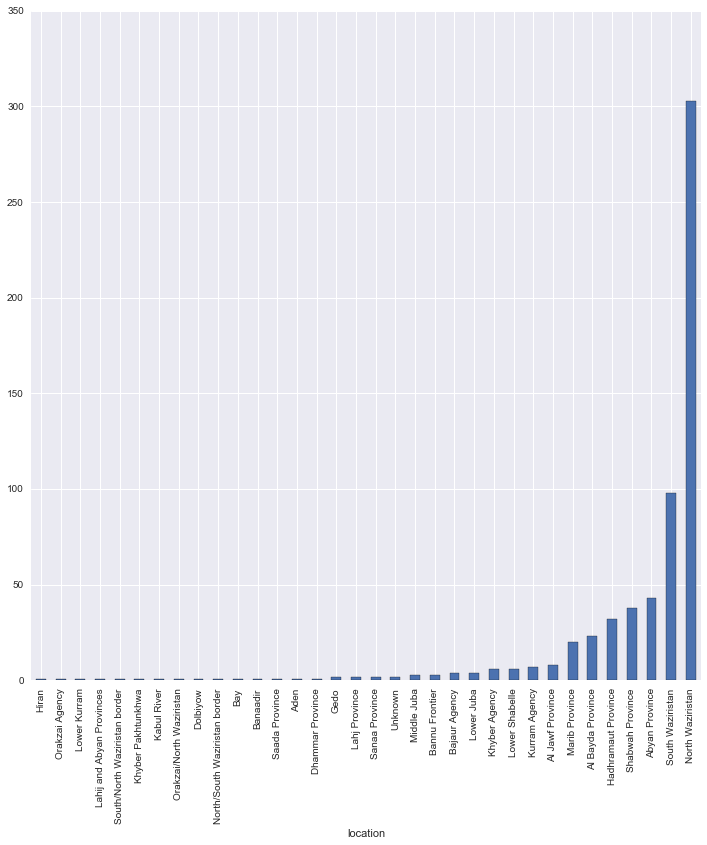

In [62]:

print drone.groupby('location').size().order()
drone.groupby('location').size().order().plot(kind = 'bar', figsize = (12,12))

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


injuries
20           1
27           1
25           1
35           1
2-24         1
4-7          1
18           1
4-8          1
30           1
5-30         1
50           1
5-11         1
1-6          1
Dozens       1
0-1          1
1-8          1
0-4          1
6-9          1
0-3          1
1-2          1
55           1
3-6          1
16           2
4-6          2
0-2          2
2-5          2
Several      2
24           2
1-4          2
11           2
17           2
Some         3
1-3          3
14           4
3-4          4
2-4          5
15           6
9            6
8            7
10           8
12          10
2-3         12
0           14
6           15
7           15
1           22
5           29
4           42
3           60
2           69
           247
dtype: int64


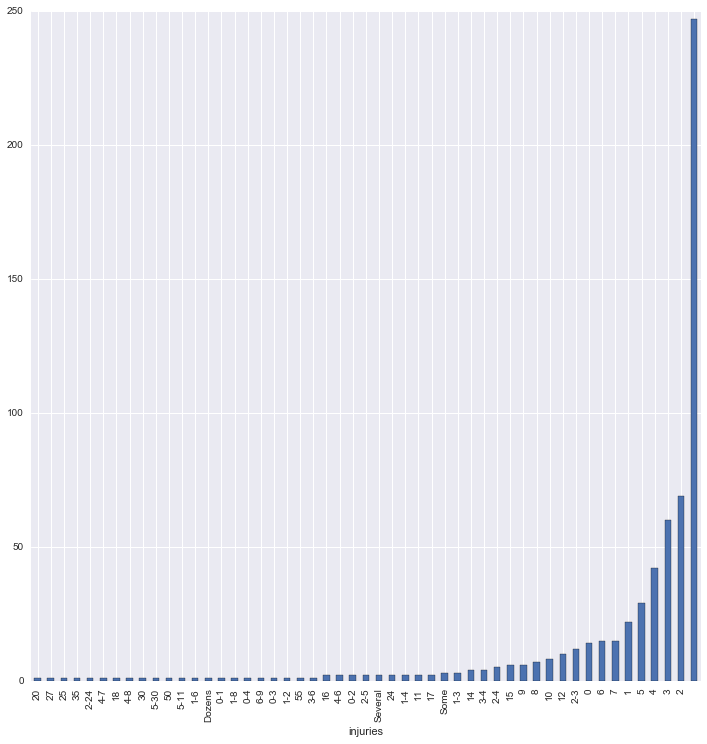

In [65]:
print drone.groupby('injuries').size().order()

drone.groupby('injuries').size().order().plot(kind = 'bar', figsize = (12,12))

In [70]:
drone.date.dtype
drone.date = pd.to_datetime(drone.date)

In [71]:
drone.date.dtype

dtype('<M8[ns]')

In [72]:
drone.index = drone['date']
del drone['date']


In [74]:
drone.head()

,_id,articles,bij_link,bij_summary_short,bureau_id,children,civilians,country,deaths,deaths_max,...,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id
date,,,,,,,,,,,,,,,,,,,,,
2002-11-03,55c79e711cbee48856a30886,[],http://www.thebureauinvestigates.com/2012/03/2...,In the first known US targeted assassination u...,YEM001,,0,Yemen,6,6,...,,15.47467,Marib Province,45.322755,"[Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...",In the first known US targeted assassination u...,1,,,278544689483890688
2004-06-17,55c79e711cbee48856a30887,[],http://www.thebureauinvestigates.com/2011/08/1...,First known drone strike in Pakistan kills at ...,B1,2,2,Pakistan,6-8,8,...,1,32.30512565,South Waziristan,69.57624435,"[Nek Mohammad, Fakhar Zaman, Azmat Khan, Marez...",The first known fatal US drone strike inside P...,2,Nek Mohammed,Wana,278544750867533824
2005-05-08,55c79e711cbee48856a30888,[],http://www.thebureauinvestigates.com/2011/08/1...,"Two killed, including Haitham al-Yemeni an al ...",B2,,,Pakistan,2,2,...,,32.98677989,North Waziristan,70.26082993,"[Haitham al-Yemeni, Samiullah Khan]",2 people killed in a Predator strike which rep...,3,Haitham al-Yemeni,Toorikhel,278544812255367168
2005-11-05,55c79e721cbee48856a30889,[],http://www.thebureauinvestigates.com/2011/08/1...,"Failed strike against Abu Hamza Rabia (""al Qae...",B3,3,3-8,Pakistan,8,8,...,1,32.99988191,North Waziristan,70.34082413,[],A failed strike destroyed Abu Hamza Rabia's ho...,4,Abu Hamza Rabia,Mosaki,278544854483628032
2005-12-01,55c79e721cbee48856a3088a,[],http://www.thebureauinvestigates.com/2011/08/1...,"Syrian Abu Hamza Rabia, the senior al Qaeda op...",B4,2,2,Pakistan,5,5,...,,33.00866349,North Waziristan,70.04196167,"[Abu Hamza Rabia, Suleiman al-Moghrabi, Amer A...","5 people were killed, including 2 children, wh...",5,Abu Hamza Rabia,Haisori,278544895789133825


In [109]:
### clean numreical data
drone.deaths_min = drone.deaths_min.map(lambda x: float(x))

d_min = []
for death in drone.deaths_min:
    if death.isdigit():
        d_min.append(int(death))
    else:
        d_min.append(0)
drone.deaths_min = d_min


d_max = []
for death in drone.deaths_max:
    if death.isint():
        d_min.append(int(death))
    else:
        d_min.append(0)
drone.deaths_min = d_max

AttributeError: 'numpy.float64' object has no attribute 'isdigit'

In [97]:
print drone.deaths_max.resample('M').size()

g = drone.deaths_max.resample('M').sum().plot(kind = 'line', figsize = (15,15))
drone.deaths_min.resample('M').sum().plot(kind = 'line', figsize = (15,15), axes = g)

date
2002-11-30     1
2002-12-31     0
2003-01-31     0
2003-02-28     0
2003-03-31     0
2003-04-30     0
2003-05-31     0
2003-06-30     0
2003-07-31     0
2003-08-31     0
2003-09-30     0
2003-10-31     0
2003-11-30     0
2003-12-31     0
2004-01-31     0
2004-02-29     0
2004-03-31     0
2004-04-30     0
2004-05-31     0
2004-06-30     1
2004-07-31     0
2004-08-31     0
2004-09-30     0
2004-10-31     0
2004-11-30     0
2004-12-31     0
2005-01-31     0
2005-02-28     0
2005-03-31     0
2005-04-30     0
              ..
2013-11-30     4
2013-12-31     6
2014-01-31     5
2014-02-28     0
2014-03-31     6
2014-04-30     4
2014-05-31     1
2014-06-30     5
2014-07-31     3
2014-08-31     3
2014-09-30     5
2014-10-31    11
2014-11-30     7
2014-12-31     4
2015-01-31     8
2015-02-28     3
2015-03-31     2
2015-04-30     3
2015-05-31     5
2015-06-30     5
2015-07-31     3
2015-08-31     5
2015-09-30     4
2015-10-31     0
2015-11-30     1
2015-12-31     2
2016-01-31     3
2016-02-2

TypeError: Empty 'DataFrame': no numeric data to plot

In [83]:
drone.deaths

date
2002-11-03          6
2004-06-17        6-8
2005-05-08          2
2005-11-05          8
2005-12-01          5
2006-01-06          8
2006-01-13      13-22
2006-10-30      81-83
2007-01-16          8
2007-04-27        3-4
2007-06-19      20-34
2007-11-02       5-10
2007-12-03    Unknown
2008-01-29      12-15
2008-02-28       8-13
2008-03-16      12-20
2008-05-14      12-20
2008-06-14          1
2008-07-28       6-12
2008-08-12      13-25
2008-08-20       8-12
2008-08-27          0
2008-08-30        4-5
2008-08-30        6-8
2008-09-02       4-10
2008-09-04        5-7
2008-09-05       5-12
2008-09-08      17-23
2008-09-12      10-15
2008-09-17        4-7
               ...   
2015-06-09          3
2015-06-24        4-5
2015-06-25        4-5
2015-07-03          4
2015-07-16       2-30
2015-07-30        4-5
2015-08-06        4-7
2015-08-12          5
2015-08-21          3
2015-08-23          4
2015-08-26          5
2015-09-01          6
2015-09-09          4
2015-09-12          4
2015-

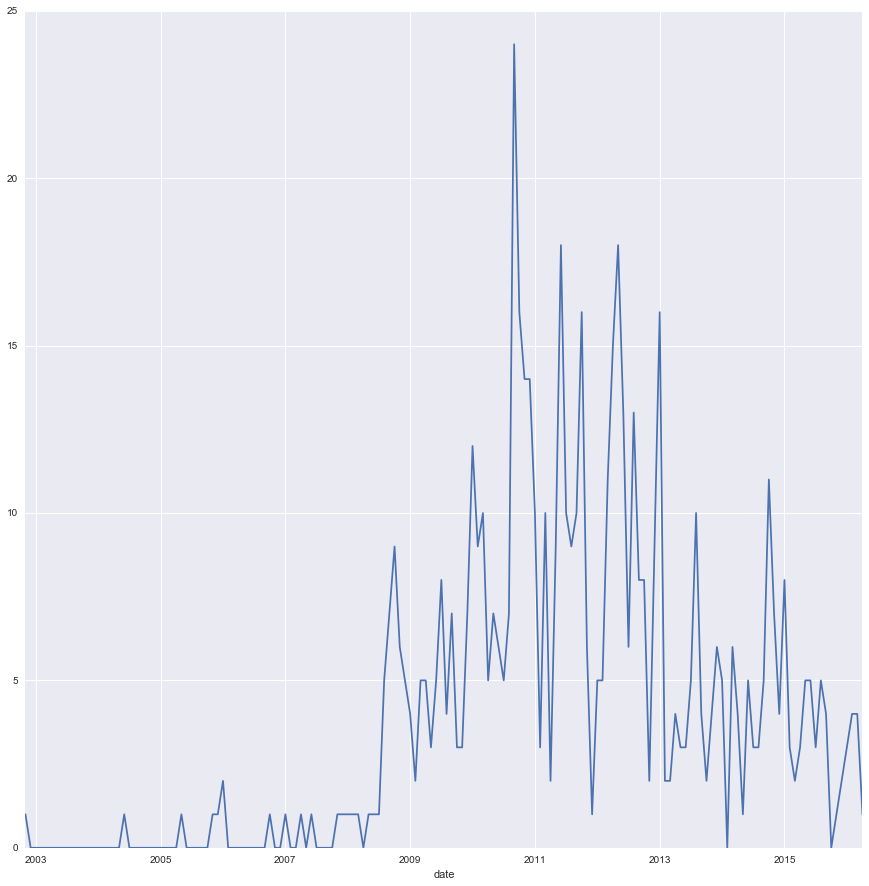

In [93]:
drone.civilians
drone.civilians.resample('M').size()

drone.civilians.resample('M').size().plot(kind = 'line', figsize = (15,15))